In [69]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
num_samples = 1000
radius = 0.1
light = 5.0
const = 0.001
s_x = np.linspace(0., 10., 100)
sigma = np.linspace(0.001,np.sqrt((2.5**2)/2), 100)
save_dir = os.path.join(os.getcwd(), './result/image')
save = True

In [71]:
def sigma(s_x):
    var = 0.5 * np.power(5.0 - s_x, 2) + const
    return np.sqrt(var)

In [72]:
def prob_particle_in_area(radius, s_x):
    sig = sigma(s_x)
    prob = 1 - np.exp(-(np.power(radius,2)/(2*np.power(sig,2))))
    return prob

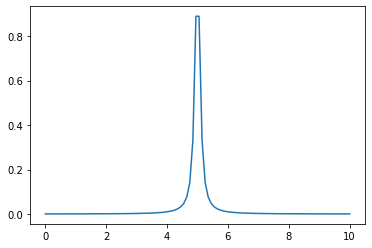

In [73]:
prob = prob_particle_in_area(radius, s_x)

plt.plot(s_x, prob)
if save:
    plt.savefig(os.path.join(save_dir, 'prob_particle_in_area'))
plt.show()

In [88]:
prob_particle_in_area(0.1, 4.95)

0.8916319767781051

In [77]:
def prob_goal(num_samples, prob, condi = 0.7):
    mean = num_samples * prob
    std = np.sqrt(num_samples * prob * (1 - prob))
    dist = scipy.stats.norm(mean, std)

    prob = 1 - dist.cdf(num_samples * condi)

    return prob

[4.58268538e-04 5.76677550e-04 7.23010347e-04 9.03137126e-04
 1.12398337e-03 1.39367791e-03 1.72171272e-03 2.11911319e-03
 2.59861744e-03 3.17486222e-03 3.86457247e-03 4.68675092e-03
 5.66286294e-03 6.81701150e-03 8.17609591e-03 9.76994743e-03
 1.16314341e-02 1.37965264e-02 1.63043152e-02 1.91969732e-02
 2.25196505e-02 2.63202962e-02 3.06493988e-02 3.55596370e-02
 4.11054373e-02 4.73424339e-02 5.43268309e-02 6.21146665e-02
 7.07609860e-02 8.03189293e-02 9.08387459e-02 1.02366750e-01
 1.14944238e-01 1.28606381e-01 1.43381132e-01 1.59288156e-01
 1.76337828e-01 1.94530317e-01 2.13854794e-01 2.34288788e-01
 2.55797719e-01 2.78334630e-01 3.01840146e-01 3.26242662e-01
 3.51458782e-01 3.77394002e-01 4.03943646e-01 4.30994024e-01
 4.58423815e-01 4.86105630e-01 5.13907738e-01 5.41695911e-01
 5.69335344e-01 5.96692611e-01 6.23637601e-01 6.50045399e-01
 6.75798059e-01 7.00786225e-01 7.24910566e-01 7.48082988e-01
 7.70227612e-01 7.91281472e-01 8.11194948e-01 8.29931926e-01
 8.47469684e-01 8.637985

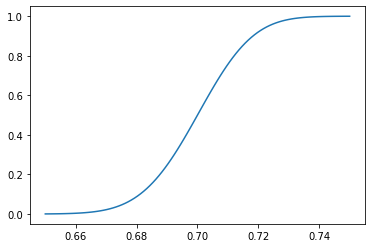

In [81]:
p = np.linspace(0.65, 0.75, 100)
goal = prob_goal(num_samples, p)

print(goal)

plt.plot(p, goal)
if save:
    plt.savefig(os.path.join(save_dir, 'prob_goal'))
plt.show()